In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/content/risco.csv')

In [ ]:
dataset.head(5)

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dataset.shape

(150, 6)

In [ ]:
 print(f"O data set tem {dataset.shape[0]} linhas e {dataset.shape[1]} colunas.")

O data set tem 150 linhas e 6 colunas.


In [ ]:
dataset.describe()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset.Risco.value_counts()

Risco_Medio    50
Risco_Alto     50
Risco_Baixo    50
Name: Risco, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


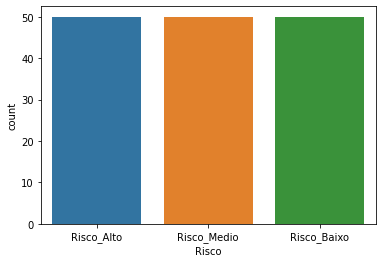

In [ ]:
sns.countplot(dataset.Risco)

In [ ]:
dataset.isna().sum()

id_cliente         0
anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

In [ ]:
dataset

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Risco_Baixo
146,146,6.3,2.5,5.0,1.9,Risco_Baixo
147,147,6.5,3.0,5.2,2.0,Risco_Baixo
148,148,6.2,3.4,5.4,2.3,Risco_Baixo


id_cliente            AxesSubplot(0.125,0.536818;0.227941x0.343182)
anot_cadastrais    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
indice_inad        AxesSubplot(0.672059,0.536818;0.227941x0.343182)
class_renda              AxesSubplot(0.125,0.125;0.227941x0.343182)
saldo_contas          AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

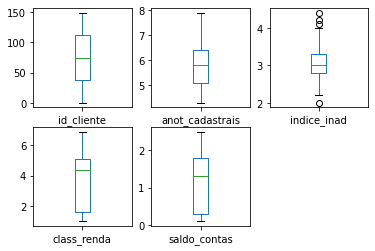

In [ ]:
from matplotlib import pyplot as plt
dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
#pyplot.show()

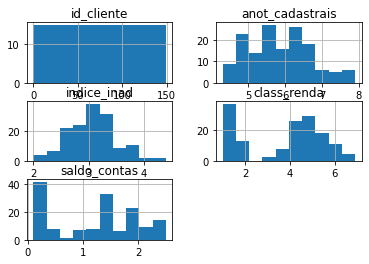

In [ ]:
dataset.hist()
plt.show()

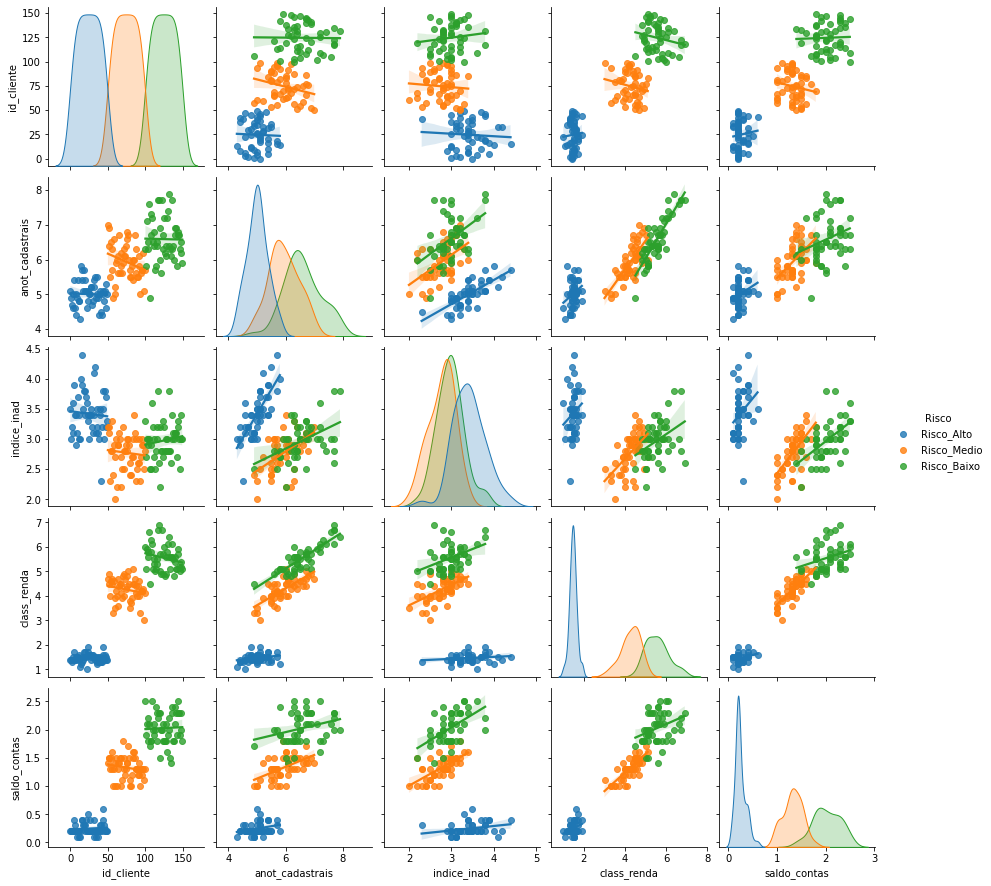

In [ ]:
sns.pairplot(dataset, hue='Risco', kind="reg")

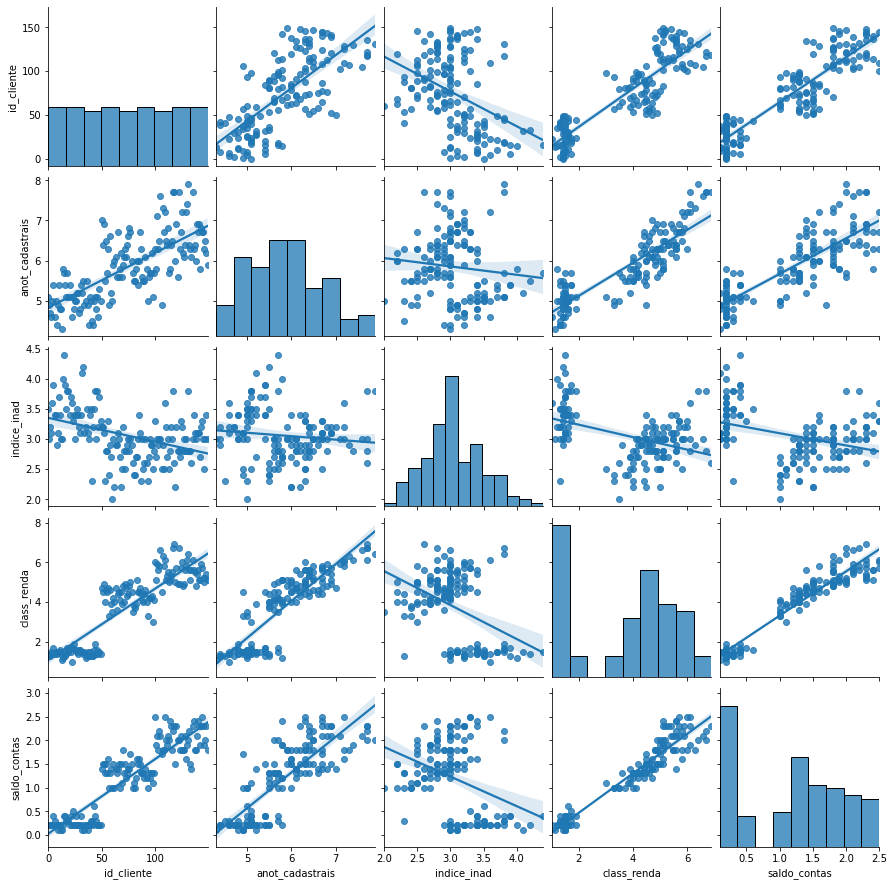

In [ ]:
sns.pairplot(dataset, kind="reg")

In [ ]:
dataset = dataset.drop(columns='id_cliente')

In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
print("\nVariáveis de Entreda da avaliação: \n\n",x[:3])
print("\nRisco - Vairável a ser Predita: \n\n",y[:3])


Variáveis de Entreda da avaliação: 

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Risco - Vairável a ser Predita: 

 ['Risco_Alto' 'Risco_Alto' 'Risco_Alto']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
print("Dados de treino: \n----------------\n")
print("x=\n", X_test[:2])
print("x=\n", y_test[:2])

print("Dados de treino: \n----------------\n")
print("x=\n", X_train[:2])
print("x=\n", y_train[:2])

Dados de treino: 
----------------

x=
 [[5.9 3.  5.1 1.8]
 [5.4 3.  4.5 1.5]]
x=
 ['Risco_Baixo' 'Risco_Medio']
Dados de treino: 
----------------

x=
 [[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1. ]]
x=
 ['Risco_Baixo' 'Risco_Medio']


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Dataset após a padronização \n----------------\n")
print("\nX_train: ", X_train[:5])
print("\nX_test: ", X_test[:5])

Dataset após a padronização 
----------------


X_train:  [[ 0.43325894 -0.59653573  0.62601116  0.82081788]
 [-0.15754871 -1.05688485 -0.09737951 -0.21464226]
 [-1.45732553  1.24486074 -1.48851543 -1.2501024 ]
 [ 1.26038965  0.09398794  0.95988378  1.20911544]
 [ 0.669582   -0.36636117  0.34778398  0.17365529]]

X_test:  [[ 0.07877435 -0.13618661  0.79294747  0.82081788]
 [-0.51203329 -0.13618661  0.45907485  0.43252033]
 [-0.98467941  1.01468618 -1.32157912 -1.12066988]
 [-0.27571024 -0.13618661  0.45907485  0.43252033]
 [-1.10284094 -1.28705941  0.45907485  0.69138537]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30)

In [ ]:
Maquina_Preditiva = Maquina_Preditiva.fit(X_train, y_train)


In [ ]:
y_pred = Maquina_Preditiva.predict(X_test)
print("Valores com dados de teste: ", y_test)
print("Valores preditos com a maquina preditiva com dados de teste", y_pred)

Valores com dados de teste:  ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']
Valores preditos com a maquina preditiva com dados de teste ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Medio'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [ ]:
Maquina_Preditiva.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')>

In [ ]:
from sklearn import metrics
print("Acurácia da maquina = ", metrics.accuracy_score(y_test, y_pred)*100)

Acurácia da maquina =  80.0


In [ ]:
print("\nReal vs Predito \n-------------------\n")
error_df = pd.DataFrame({"Real": y_test,
                         "Predito": y_pred})
error_df.head(5)


Real vs Predito 
-------------------



,Real,Predito
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Medio


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

print("Acurácia da máquina = ", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

Acurácia da máquina =  80.0
[[7 0 0]
 [0 8 3]
 [0 3 9]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.73      0.73      0.73        11
 Risco_Medio       0.75      0.75      0.75        12

    accuracy                           0.80        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.80      0.80      0.80        30



Segunda versão


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',
                 gamma= 1e-5,
                 C=10,
                 random_state=7)



In [ ]:
classifier.fit(X_train,y_train)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)
print("Valores com dados de teste: ", y_pred)
print("Valores preditos com a maquina preditiva com dados de teste", y_test)

Valores com dados de teste:  ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']
Valores preditos com a maquina preditiva com dados de teste ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [ ]:
classifier

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn import metrics
print("Acurácia: %", metrics.accuracy_score(y_test, y_pred)*100)

print("Atual vs Predito \n--------------\n")
error_df = pd.DataFrame({"Atual": y_test, 
                         "Predito": y_pred})

error_df.head(5)

Acurácia: % 93.33333333333333
Atual vs Predito 
--------------



,Atual,Predito
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Baixo


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cr)
print(cm)


              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.85      1.00      0.92        11
 Risco_Medio       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

[[ 7  0  0]
 [ 0 11  0]
 [ 0  2 10]]
